# K-means clustering & Schools.csv

# Import packages & data (schools.csv)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import cdist 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("data/schools.csv")

In [3]:
df.head()

,School_Code,School_Name,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,10505.0,Abington High,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8
1,10003.0,Beaver Brook Elementary School,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6
2,10002.0,Center Elementary School,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6
3,10405.0,Frolio Middle School,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1
4,10015.0,Woodsdale Elementary School,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   School_Code                       1861 non-null   float64
 1   School_Name                       1861 non-null   object 
 2   Pct_First_Language_Not_English    1850 non-null   float64
 3   Pct_English_Language_Learner      1850 non-null   float64
 4   Pct_Students_With_Disabilities    1850 non-null   float64
 5   Pct_High_Needs                    1850 non-null   float64
 6   Pct_Economically_Disadvantaged    1850 non-null   float64
 7   Pct_African_American              1850 non-null   float64
 8   Pct_Asian                         1850 non-null   float64
 9   Pct_Hispanic                      1850 non-null   float64
 10  Pct_White                         1850 non-null   float64
 11  Pct_Native_American               1850 non-null   float64
 12  Pct_Na

In [5]:
df.describe()

,School_Code,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
count,1.861000e+03,1850.00000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1823.000000
mean,2.918442e+06,18.54827,9.548432,18.223676,46.616216,31.816649,8.699459,6.050919,18.996649,62.326486,0.233459,0.098000,3.596595,51.899405,48.095135,18.320570
std,3.941407e+06,20.03104,13.163096,11.462500,22.966461,22.409908,13.698280,8.763984,22.575734,29.562086,0.501732,0.285813,2.420830,5.121577,5.122469,3.966979
min,1.000200e+04,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,2.000000
25%,9.700600e+05,3.20000,0.900000,12.900000,27.400000,12.825000,1.400000,1.200000,4.000000,41.000000,0.000000,0.000000,1.900000,49.400000,46.400000,16.300000
50%,2.100410e+06,10.50000,3.600000,16.100000,41.200000,25.900000,3.300000,2.600000,8.200000,73.200000,0.000000,0.000000,3.200000,51.400000,48.600000,18.600000
75%,3.310030e+06,27.90000,13.200000,20.000000,64.975000,47.800000,8.700000,6.900000,27.300000,86.600000,0.300000,0.100000,4.775000,53.600000,50.600000,20.800000
max,3.902090e+07,100.00000,82.900000,100.000000,100.000000,94.400000,86.900000,73.700000,98.000000,100.000000,8.000000,6.100000,17.400000,100.000000,76.000000,41.100000


# Data Preparation 

- Drop two columns ('School_Code', 'School_Name')
- Handle missing values

In [6]:
df = df.drop(["School_Code", "School_Name"], axis=1)

In [7]:
df = df.dropna()
df.isnull().sum()

Pct_First_Language_Not_English      0
Pct_English_Language_Learner        0
Pct_Students_With_Disabilities      0
Pct_High_Needs                      0
Pct_Economically_Disadvantaged      0
Pct_African_American                0
Pct_Asian                           0
Pct_Hispanic                        0
Pct_White                           0
Pct_Native_American                 0
Pct_Native_Hawaiian_Pacific_Isla    0
Pct_MultiRace_NonHispanic           0
Pct_Males                           0
Pct_Females                         0
Average_Class_Size                  0
dtype: int64

In [8]:
df.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6
2,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6
3,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1
4,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4


# Perform variance analysis

- Explain why data normalization is necessary

In [9]:
df.var()

Pct_First_Language_Not_English      404.383426
Pct_English_Language_Learner        174.065427
Pct_Students_With_Disabilities      124.524392
Pct_High_Needs                      527.478833
Pct_Economically_Disadvantaged      504.583759
Pct_African_American                185.179021
Pct_Asian                            76.950470
Pct_Hispanic                        512.353186
Pct_White                           877.534691
Pct_Native_American                   0.247437
Pct_Native_Hawaiian_Pacific_Isla      0.079760
Pct_MultiRace_NonHispanic             5.876525
Pct_Males                            25.421004
Pct_Females                          25.430093
Average_Class_Size                   15.736926
dtype: float64

# Normalize data & Check variance again

In [10]:
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,-0.13276,-0.086390,-0.084592,-0.177116,-0.108704,-0.080131,-0.061879,-0.100950,0.23435,-0.003895,0.016897,-0.155412,-0.082948,0.083022,-0.064465
1,-0.08076,-0.028489,-0.048592,-0.094116,-0.089636,-0.083857,-0.056452,-0.125440,0.26035,0.033605,0.016897,-0.189895,-0.022422,0.022495,0.160599
2,-0.05776,-0.079152,0.030408,-0.125116,-0.163789,-0.059013,-0.041527,-0.108093,0.22335,-0.028895,-0.015890,-0.207136,0.030210,-0.030136,-0.095155
3,-0.13076,-0.093627,-0.050592,-0.157116,-0.107645,-0.077646,-0.057809,-0.131563,0.26935,-0.028895,-0.015890,-0.189895,0.019683,-0.019610,0.071085
4,-0.12676,-0.091215,-0.073592,-0.159116,-0.095992,-0.082615,-0.063236,-0.150950,0.29735,-0.028895,-0.015890,-0.189895,-0.015843,0.015917,0.308937


In [11]:
X.var()

Pct_First_Language_Not_English      0.040438
Pct_English_Language_Learner        0.025328
Pct_Students_With_Disabilities      0.012452
Pct_High_Needs                      0.052748
Pct_Economically_Disadvantaged      0.056623
Pct_African_American                0.028576
Pct_Asian                           0.014167
Pct_Hispanic                        0.053348
Pct_White                           0.087753
Pct_Native_American                 0.003866
Pct_Native_Hawaiian_Pacific_Isla    0.002144
Pct_MultiRace_NonHispanic           0.019410
Pct_Males                           0.004401
Pct_Females                         0.004403
Average_Class_Size                  0.010294
dtype: float64

# Clustering analysis (k = 2): Include "random_state=0"

In [12]:
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)

In [13]:
k_means.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
k_means.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [15]:
k_means.cluster_centers_

array([[ 8.82389449,  3.54134988, 16.82746315, 34.31838635, 20.25259891,
         3.5973623 ,  5.9458495 ,  7.32885958, 79.06811482,  0.23607448,
         0.09325058,  3.73188518, 51.47106284, 48.52179984, 18.28681148],
       [42.11629213, 24.09400749, 21.37397004, 75.94438202, 59.5428839 ,
        20.84812734,  6.33726592, 47.14906367, 22.04606742,  0.21928839,
         0.10580524,  3.29588015, 52.94925094, 47.0488764 , 18.40205993]])

In [16]:
df1 = pd.DataFrame(k_means.labels_,columns = ['cluster'])

In [17]:
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [18]:
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df.join(df1)
df2.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size,cluster
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8,0
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6,0
2,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6,0
3,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1,0
4,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4,0


In [19]:
df2.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,8.823894,3.541350,16.827463,34.318386,20.252599,3.597362,5.945849,7.328860,79.068115,0.236074,0.093251,3.731885,51.471063,48.521800,18.286811
1,42.116292,24.094007,21.373970,75.944382,59.542884,20.848127,6.337266,47.149064,22.046067,0.219288,0.105805,3.295880,52.949251,47.048876,18.402060


In [20]:
df2.groupby(['cluster']).count()


,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289,1289
1,534,534,534,534,534,534,534,534,534,534,534,534,534,534,534


In [21]:
df.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6
2,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6
3,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1
4,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4


# Interpretation of Clustering Analysis

- When you answer the following questions below, use the original data (not the normalized data) for better interpretability

## How many observations are there in cluster 1 and cluster 2?

In [22]:
1270, 521

(1270, 521)

## The mean values of each cluster in terms of different variables (e.g., Pct_High_Needs)

In [23]:
df2.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,8.823894,3.541350,16.827463,34.318386,20.252599,3.597362,5.945849,7.328860,79.068115,0.236074,0.093251,3.731885,51.471063,48.521800,18.286811
1,42.116292,24.094007,21.373970,75.944382,59.542884,20.848127,6.337266,47.149064,22.046067,0.219288,0.105805,3.295880,52.949251,47.048876,18.402060


## What is the profile of each cluster?

In [24]:
df2.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,8.823894,3.541350,16.827463,34.318386,20.252599,3.597362,5.945849,7.328860,79.068115,0.236074,0.093251,3.731885,51.471063,48.521800,18.286811
1,42.116292,24.094007,21.373970,75.944382,59.542884,20.848127,6.337266,47.149064,22.046067,0.219288,0.105805,3.295880,52.949251,47.048876,18.402060


## The mean values for"Pct_African_American" in each cluster. Also visualize it.

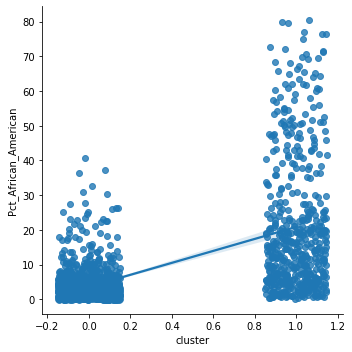

In [25]:
sns.lmplot("cluster", "Pct_African_American", df2, x_jitter=.15, y_jitter=.15)

In [26]:
df2.groupby(['cluster']).mean()["Pct_African_American"]

cluster
0     3.597362
1    20.848127
Name: Pct_African_American, dtype: float64

## Which of the following statement is TRUE?

a. Schools in cluster 1, on average, have a higher percentage of African American students?

b. Schools in cluster 2, on average, have a higher percentage of African American students?

## The mean values for "Pct_First_Language_Not_English" in each cluster. Also visualize it.

In [27]:
df2.groupby(['cluster']).mean()["Pct_First_Language_Not_English"]


cluster
0     8.823894
1    42.116292
Name: Pct_First_Language_Not_English, dtype: float64

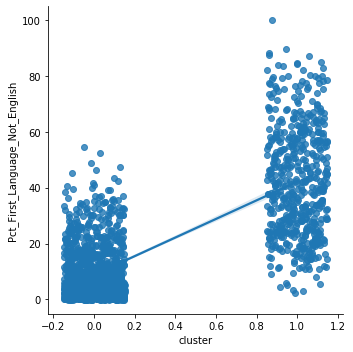

In [28]:
sns.lmplot("cluster", "Pct_First_Language_Not_English", df2, x_jitter=.15, y_jitter=.15)

## Which cluster has a higher percentage of economically disadvantaged students __________

In [29]:
df2.groupby(['cluster']).count()['Pct_Economically_Disadvantaged']

cluster
0    1289
1     534
Name: Pct_Economically_Disadvantaged, dtype: int64

# Build Decision Tree model (use the original data, not the normalizaed data)

- Do model building using decision tree algorithm
- Visualize and embed decision tree (in pdf) in Jupyter Notebook

In [30]:
y = df2['cluster'].values
X = df2.drop(['cluster'], axis=1)

In [31]:
X.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6
2,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6
3,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1
4,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4


In [32]:
df2.isnull().sum()

Pct_First_Language_Not_English      0
Pct_English_Language_Learner        0
Pct_Students_With_Disabilities      0
Pct_High_Needs                      0
Pct_Economically_Disadvantaged      0
Pct_African_American                0
Pct_Asian                           0
Pct_Hispanic                        0
Pct_White                           0
Pct_Native_American                 0
Pct_Native_Hawaiian_Pacific_Isla    0
Pct_MultiRace_NonHispanic           0
Pct_Males                           0
Pct_Females                         0
Average_Class_Size                  0
cluster                             0
dtype: int64

In [33]:
# instantiate a decision tree model, and fit with X and y
model = DecisionTreeClassifier()

model = model.fit(X, y)    # without model validation since this model is not for prediction, but for explanation

# check the accuracy on the training set
model.score(X, y)

1.0

In [34]:
predicted_y = model.predict(X)
print(predicted_y)

[0 0 0 ... 1 0 1]


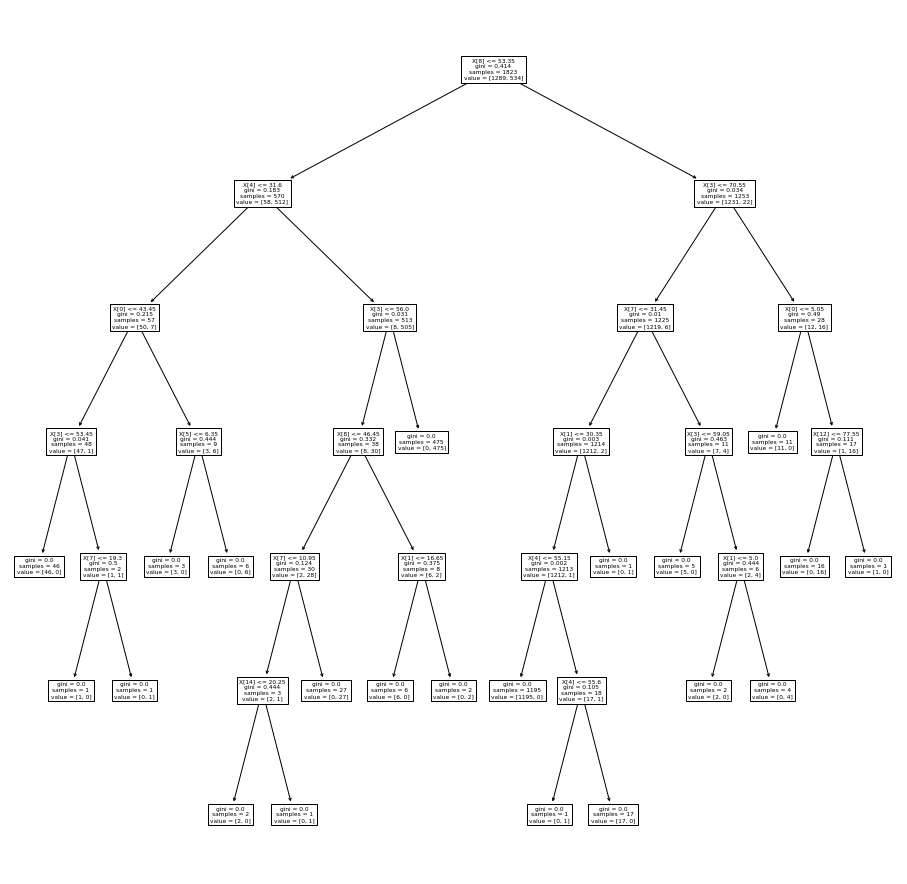

In [38]:
plt.figure(figsize=(16,16))
tree.plot_tree(model);

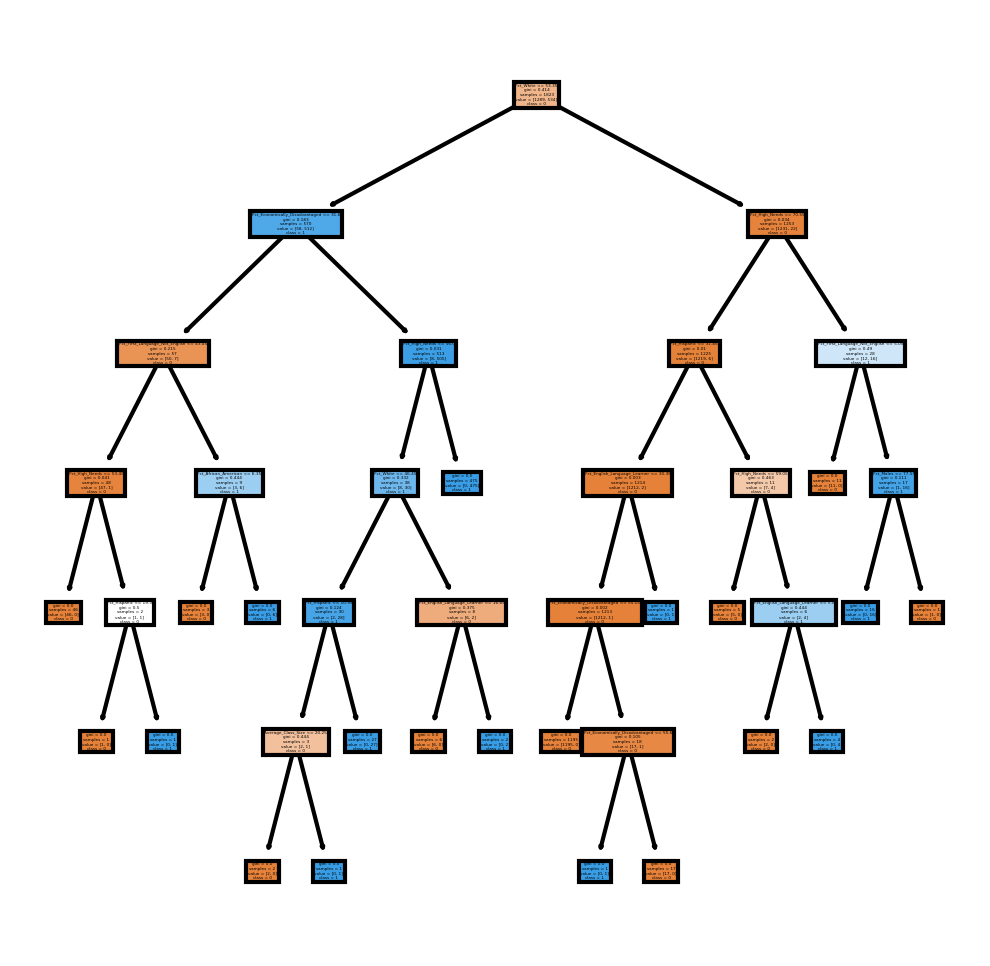

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = X.columns, 
               class_names=['0','1','2','3'],    
               filled = True);

## Develop two decision rules from the decision tree you just created

- Rule #1

- Rule #2

In [50]:
from sklearn.tree import export_text

r = export_text(model, feature_names=(list(X.columns)))
print(r)

|--- Pct_White <= 53.35
|   |--- Pct_Economically_Disadvantaged <= 31.60
|   |   |--- Pct_First_Language_Not_English <= 43.45
|   |   |   |--- Pct_High_Needs <= 53.45
|   |   |   |   |--- class: 0
|   |   |   |--- Pct_High_Needs >  53.45
|   |   |   |   |--- Pct_Hispanic <= 19.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pct_Hispanic >  19.30
|   |   |   |   |   |--- class: 1
|   |   |--- Pct_First_Language_Not_English >  43.45
|   |   |   |--- Pct_African_American <= 6.35
|   |   |   |   |--- class: 0
|   |   |   |--- Pct_African_American >  6.35
|   |   |   |   |--- class: 1
|   |--- Pct_Economically_Disadvantaged >  31.60
|   |   |--- Pct_High_Needs <= 56.00
|   |   |   |--- Pct_White <= 46.45
|   |   |   |   |--- Pct_Hispanic <= 10.95
|   |   |   |   |   |--- Average_Class_Size <= 20.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Average_Class_Size >  20.25
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Pct_Hispanic >  10.95
|   |   |   |

IF % white is less than 53.35 AND % Economically disadvantaged is less than or equal to 31.6 AND % First language not enlighs is less than or equal to 43.45 AND % high needs is less than or equal to 53.45, belong to cluster 0

## Decision tree also shows the variables that are more important in creating clusters. Which variables are considered most important in this clustering analysis?

## Build randomforestclassifier model for feature importance 

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    
clf=clf.fit(X, y)
clf.score(X,y)

1.0

In [43]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Pct_First_Language_Not_English,0.035112
1,Pct_English_Language_Learner,0.093839
2,Pct_Students_With_Disabilities,0.004480
3,Pct_High_Needs,0.211829
4,Pct_Economically_Disadvantaged,0.148944
5,Pct_African_American,0.016413
6,Pct_Asian,0.008705
7,Pct_Hispanic,0.177331
8,Pct_White,0.279210
9,Pct_Native_American,0.000903


most important feautre is if white

## Which variables are considered least important in this clustering analysis?

least important variables is gender and average class size

## Is the "average class size" considered important in this clustering analysis? Explain why.

No because its importance is very low compared to other variables

# Clustering analysis using AgglomerativeClustering (# of clusters = 2)

In [44]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [53]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()


,cluster
0,0
1,0
2,0
3,0
4,0


In [57]:
df2 = X.join(df1)
df2.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size,cluster
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8,0
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6,0
2,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6,0
3,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1,0
4,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4,0


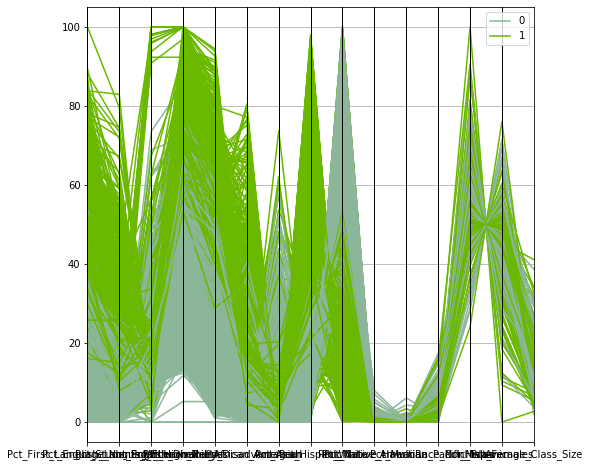

In [55]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,8))
parallel_coordinates(df2, 'cluster')

## Visualize dendrogram

- p = 2

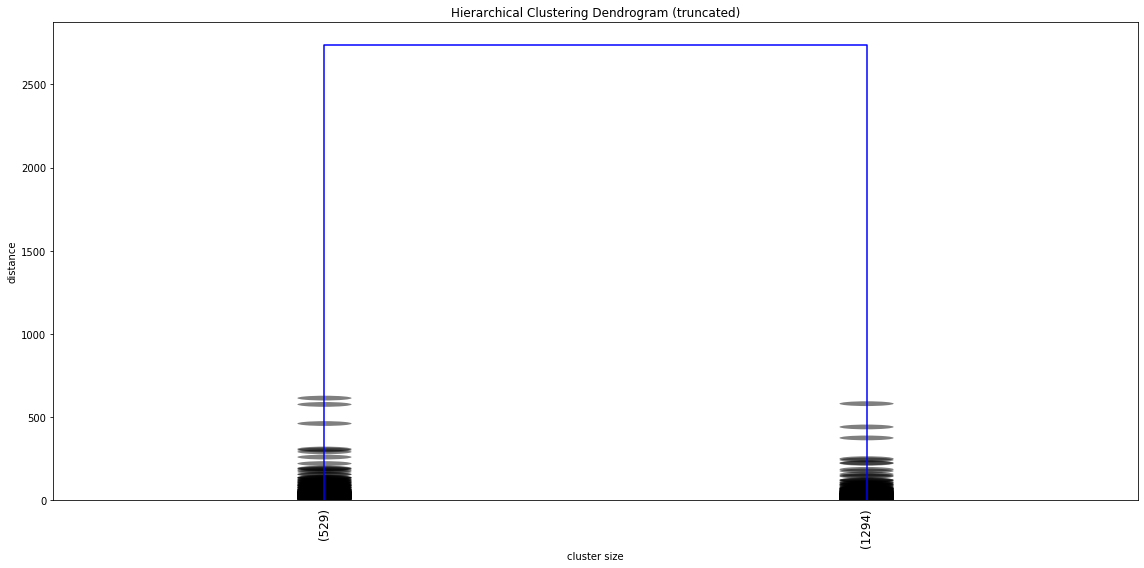

In [46]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('cluster size')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top"
          )
plt.tight_layout() # fixes margins

## How many observations are in each cluster?

529, 1294

## What is the profile of each cluster?

In [48]:
df2.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,8.823894,3.541350,16.827463,34.318386,20.252599,3.597362,5.945849,7.328860,79.068115,0.236074,0.093251,3.731885,51.471063,48.521800,18.286811
1,42.116292,24.094007,21.373970,75.944382,59.542884,20.848127,6.337266,47.149064,22.046067,0.219288,0.105805,3.295880,52.949251,47.048876,18.402060


## Compare the results from K-Mean clustering analysis and Agglomerative clustering analysis.

In [51]:
#kmean
df2.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,8.823894,3.541350,16.827463,34.318386,20.252599,3.597362,5.945849,7.328860,79.068115,0.236074,0.093251,3.731885,51.471063,48.521800,18.286811
1,42.116292,24.094007,21.373970,75.944382,59.542884,20.848127,6.337266,47.149064,22.046067,0.219288,0.105805,3.295880,52.949251,47.048876,18.402060


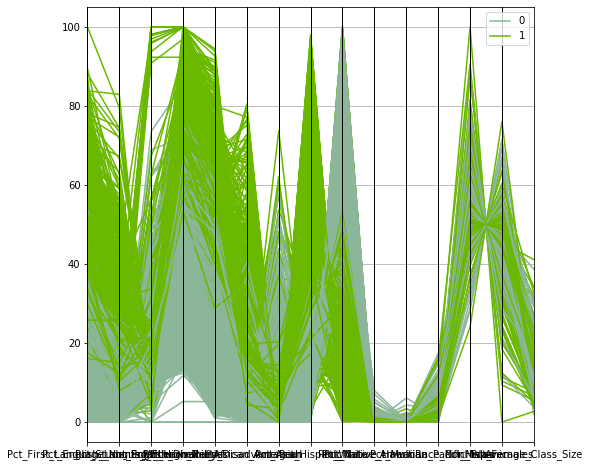

In [60]:
#agglomerative
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,8))
parallel_coordinates(df2, 'cluster')



Results are simliar in %'s as both models create 2 clusters that hold approxiamtely the same % of people for each variables. 

Note: Several questions have been adapted from "SAS Enterprise Miner Exercise and Assignment Workbook by Varol Onur Kayhan"